In [1]:
import matplotlib.pyplot as plt

def plot_over_epochs(y_values: list, title: str, y_label: str, legend: str, yscale: str = None):
    plt.figure(figsize=(4, 4))
    if yscale == 'log':
        plt.yscale('log')
    plt.plot(list(range(len(y_values))), y_values, label=legend)
    plt.title(title)
    plt.xlabel('epochs')
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

In [2]:
from neural_network import NeuralNetwork
from neural_network_utility import evaluate
from math_functions.function_enums import LossFunction, ActivationFunction, Metrics
from dataset_reader import read_monk, read_cup, read_old_cup
from validation import kfold_cv, holdout, kfold_cv_ensemble
from grid import grid_search, get_top_n_results, get_all_results
from sklearn.utils import shuffle
from utils import count_configs, save_top_plots, get_list_models
from ensemble import Ensemble
import numpy as np
import json

# 1. MONKS

### 1.1. Monks-1

In [82]:
train_data, train_target = read_monk('datasets/monks/monks-1.train')
test_data, test_target = read_monk('datasets/monks/monks-1.test')
train_data, train_target = shuffle(train_data, train_target)

# train_data, val_data, train_target, val_target = holdout(train_data, train_target, 0.66, shuffle=True)

In [83]:
nn_monk1 = NeuralNetwork(
    n_hidden_layers=1, 
    hidden_layer_sizes=[3], 
    n_output_units=1, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.ACCURACY.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.SIGMOID.value, 
    learning_rate=0.05,
    reg_lambda=0,
    mom_alpha=0.9,
    nesterov=False,
    epochs=500, 
    batch_size=1, 
    classification=True, 
    early_stopping=False,
    fast_stopping=False, 
    linear_decay=True,
    patience=30, 
    tolerance=0.00001,
    tao=500, 
    verbose=False
    )

nn_monk1.train_net(train_data, train_target)

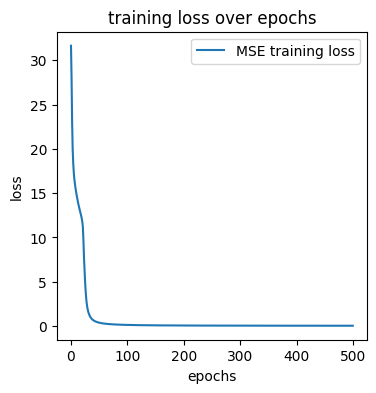

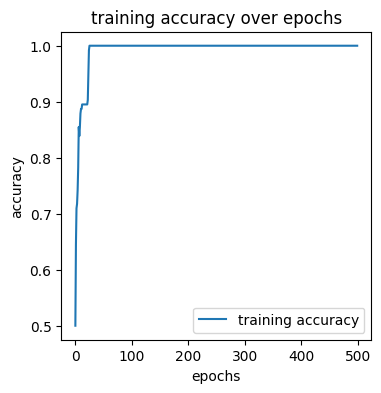

In [86]:
plot_over_epochs(y_values=nn_monk1.training_losses, title='training loss over epochs', y_label='loss', legend='MSE training loss')
plot_over_epochs(y_values=nn_monk1.training_evaluations, title='training accuracy over epochs', y_label='accuracy', legend='training accuracy')
# plot_over_epochs(y_values=nn_monk1.validation_losses, title='validation loss over epochs', y_label='loss', legend='MSE validation loss')
# plot_over_epochs(y_values=nn_monk1.validation_evaluations, title='validation accuracy over epochs', y_label='accuracy', legend='validation accuracy')

In [85]:
test_accuracy = nn_monk1.predict_and_evaluate(test_data, test_target, Metrics.ACCURACY.value)
test_mse = nn_monk1.predict_and_evaluate(test_data, test_target, Metrics.MSE.value)
test_mee = nn_monk1.predict_and_evaluate(test_data, test_target, Metrics.MEE.value)
print("TEST RESULTS:")
print(f"Accuracy: {test_accuracy} \nMSE: {test_mse} \nMEE: {test_mee}")
print("------------------")
print("TRAINING RESULTS:")
print(f"Accuracy: {nn_monk1.training_evaluations[-1]} \nMSE: {nn_monk1.training_losses[-1]}")

TEST RESULTS:
Accuracy: 1.0 
MSE: 0.00037469182697207016 
MEE: 0.016182480319384247
------------------
TRAINING RESULTS:
Accuracy: 1.0 
MSE: 0.032293754096759476


### 1.2. Monks-2

In [53]:
train_data, train_target = read_monk('datasets/monks/monks-2.train')
test_data, test_target = read_monk('datasets/monks/monks-2.test')
train_data, train_target = shuffle(train_data, train_target)

train_data, val_data, train_target, val_target = holdout(train_data, train_target, 0.66, shuffle_set=True)

In [54]:
nn_monk2 = NeuralNetwork(
    n_hidden_layers=1,
    hidden_layer_sizes=[3], 
    n_output_units=1, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value,
    evaluation_metric_type_value=Metrics.ACCURACY.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.SIGMOID.value, 
    learning_rate=0.2,
    reg_lambda=0,
    mom_alpha=0.9,
    epochs=1000, 
    batch_size=1, 
    classification=True, 
    early_stopping=True, 
    linear_decay=True,
    patience=20, 
    tolerance=0.00001,
    tao=300, 
    verbose=False
    )

nn_monk2.train_net(train_data, train_target, test_data, test_target)

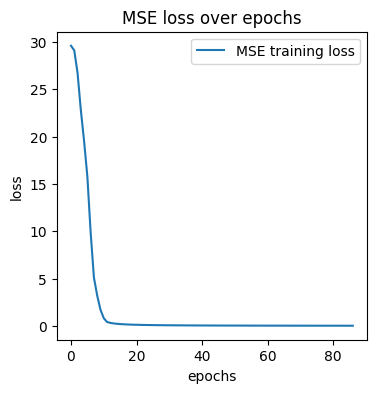

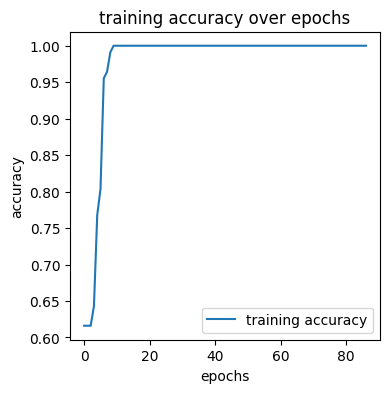

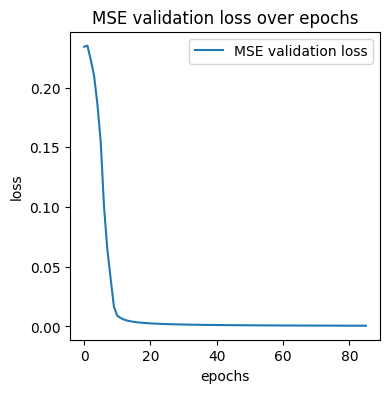

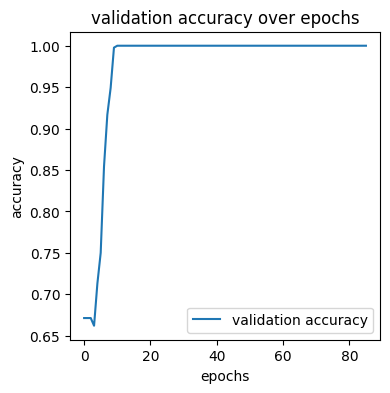

In [55]:
plot_over_epochs(y_values=nn_monk2.training_losses, title='MSE loss over epochs', y_label='loss', legend='MSE training loss')
plot_over_epochs(y_values=nn_monk2.training_evaluations, title='training accuracy over epochs', y_label='accuracy', legend='training accuracy')
plot_over_epochs(y_values=nn_monk2.validation_losses, title='MSE validation loss over epochs', y_label='loss', legend='MSE validation loss')
plot_over_epochs(y_values=nn_monk2.validation_evaluations, title='validation accuracy over epochs', y_label='accuracy', legend='validation accuracy')

In [56]:
test_accuracy = nn_monk2.predict_and_evaluate(test_data, test_target, Metrics.ACCURACY.value)
test_mse = nn_monk2.predict_and_evaluate(test_data, test_target, Metrics.MSE.value)
test_mee = nn_monk2.predict_and_evaluate(test_data, test_target, Metrics.MEE.value)
print("TEST RESULTS:")
print(f"Accuracy: {test_accuracy} \nMSE: {test_mse} \nMEE: {test_mee}")
print("------------------")
print("TRAINING RESULTS:")
print(f"Accuracy: {nn_monk2.training_evaluations[-1]} \nMSE: {nn_monk2.training_losses[-1]}")

TEST RESULTS:
Accuracy: 1.0 
MSE: 0.0005626081436743705 
MEE: 0.017728990431088953
------------------
TRAINING RESULTS:
Accuracy: 1.0 
MSE: 0.020915174244635466


### 1.3. Monks-3

In [3]:
train_data, train_target = read_monk('datasets/monks/monks-3.train')
test_data, test_target = read_monk('datasets/monks/monks-3.test')
train_data, train_target = shuffle(train_data, train_target)

train_data, val_data, train_target, val_target = holdout(train_data, train_target, 0.66, shuffle_set=True)

In [8]:
nn_monk3 = NeuralNetwork(
    hidden_layer_sizes=[3], 
    n_output_units=1, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.ACCURACY.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.SIGMOID.value, 
    learning_rate=0.005, 
    reg_lambda=0.0005,
    mom_alpha=0.9,
    nesterov=False,
    epochs=500, 
    batch_size=4, 
    classification=True, 
    early_stopping=True,
    fast_stopping=False, 
    linear_decay=True,
    patience=30, 
    tolerance=0.001, 
    tao=500,
    verbose=False
    )
nn_monk3.train_net(train_data, train_target, val_data, val_target)

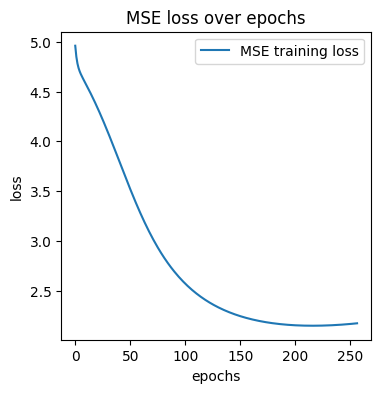

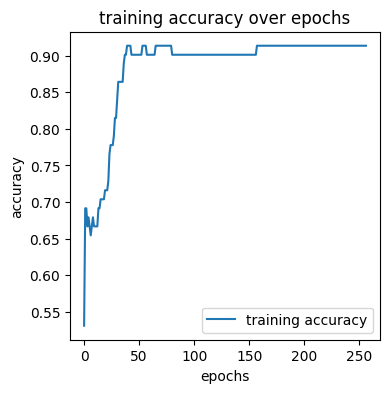

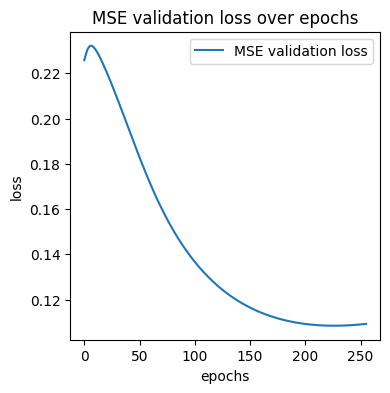

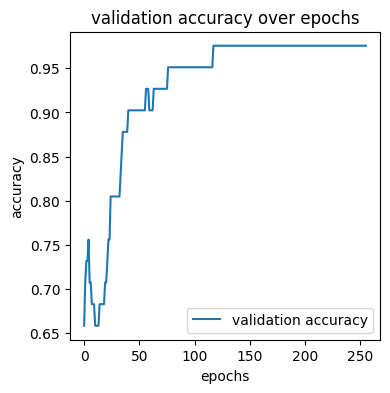

In [9]:
plot_over_epochs(y_values=nn_monk3.training_losses, title='MSE loss over epochs', y_label='loss', legend='MSE training loss')
plot_over_epochs(y_values=nn_monk3.training_evaluations, title='training accuracy over epochs', y_label='accuracy', legend='training accuracy')
plot_over_epochs(y_values=nn_monk3.validation_losses, title='MSE validation loss over epochs', y_label='loss', legend='MSE validation loss')
plot_over_epochs(y_values=nn_monk3.validation_evaluations, title='validation accuracy over epochs', y_label='accuracy', legend='validation accuracy')

In [10]:
test_accuracy = nn_monk3.predict_and_evaluate(test_data, test_target, Metrics.ACCURACY.value)
test_mse = nn_monk3.predict_and_evaluate(test_data, test_target, Metrics.MSE.value)
test_mee = nn_monk3.predict_and_evaluate(test_data, test_target, Metrics.MEE.value)
print("TEST RESULTS:")
print(f"Accuracy: {test_accuracy} \nMSE: {test_mse} \nMEE: {test_mee}")
print("------------------")
print("TRAINING RESULTS:")
print(f"Accuracy: {nn_monk3.training_evaluations[-1]} \nMSE: {nn_monk3.training_losses[-1]}")

TEST RESULTS:
Accuracy: 0.9537037037037037 
MSE: 0.10818532618328146 
MEE: 0.30409357826941985
------------------
TRAINING RESULTS:
Accuracy: 0.9135802469135802 
MSE: 2.170720944822195


### 1.4. Monks-3 Kfold-cv

In [3]:
data, target = read_monk('datasets/monks/monks-3.train')

net = NeuralNetwork(
    hidden_layer_sizes=[3], 
    n_output_units=1, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.ACCURACY.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.SIGMOID.value, 
    learning_rate=0.05, 
    reg_lambda=0,
    mom_alpha=0.6,
    nesterov=False,
    epochs=500, 
    batch_size=1, 
    classification=True, 
    early_stopping=True,
    fast_stopping=False, 
    linear_decay=True,
    patience=30, 
    tolerance=0.001, 
    tao=300,
    verbose=False
)

metrics = [Metrics.MSE.value, Metrics.MEE.value, Metrics.ACCURACY.value]
kfold_cv(5, data, target, metrics, net, verbose=True, plot=True)


Fold 2:
Fold validation mse: 0.04470363405644723
Fold validation mee: 0.10954869711423783
Fold validation accuracy: 0.96
Training loss: 1.5024205624272218
Training evaluation accuracy: 0.9846153846153847
Internal validation loss: 0.14517370396756493
Internal validation evaluation accuracy: 0.84375

Fold 3:
Fold validation mse: 0.054011664225964075
Fold validation mee: 0.1420470989415937
Fold validation accuracy: 0.9583333333333334
Training loss: 2.618593433280274
Training evaluation accuracy: 0.9538461538461539
Internal validation loss: 0.0973524892632833
Internal validation evaluation accuracy: 0.8787878787878788

Fold 4:
Fold validation mse: 0.09534986945035806
Fold validation mee: 0.15164957848644078
Fold validation accuracy: 0.9166666666666666
Training loss: 2.375787950218033
Training evaluation accuracy: 0.9692307692307692
Internal validation loss: 0.05782111176178398
Internal validation evaluation accuracy: 0.9090909090909091

Fold 1:
Fold validation mse: 0.08957241108330416
Fol

{'tr_losses_mean': 7.544449100324371,
 'tr_losses_std': 10.901070542150611,
 'internal_val_losses_mean': 0.1329787338608052,
 'internal_val_losses_std': 0.09230639082975872,
 'tr_evals_accuracy_mean': 0.8830769230769231,
 'tr_evals_accuracy_std': 0.17258219892160198,
 'internal_val_evals_accuracy_mean': 0.847159090909091,
 'internal_val_evals_accuracy_std': 0.09548460325213982,
 'validation_mse_mean': 0.17094721308848168,
 'validation_mee_mean': 0.23040114500437503,
 'validation_accuracy_mean': 0.8263333333333334,
 'validation_mse_std': 0.20103194886141057,
 'validation_mee_std': 0.1827579297347215,
 'validation_accuracy_std': 0.2069578593713115}

In [3]:
data, target = read_monk('datasets/monks/monks-3.train')

fixed_params = dict(
    hidden_layer_sizes=[3], 
    n_output_units=1, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.ACCURACY.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.SIGMOID.value, 
    classification=True, 
    early_stopping=True,
    linear_decay=True,
    fast_stopping=False, 
    patience=30, 
    tolerance=0.001, 
    epochs=500, 
    tao=500,
    verbose=False,
    mom_alpha=0.6,
    nesterov=False,
    batch_size=1, 
)

grid_params = dict(
    learning_rate=[0.05, 0.08, 0.1, 0.2], 
    reg_lambda=[0, 0.0001, 0.00001],
    
)

results = grid_search(data, target, [Metrics.MSE.value, Metrics.ACCURACY.value], fixed_params, grid_params, "monks_3_results.json", verbose=True, plot=True)

Grid over n_configurations: 12



Configuration: hidden_layer_sizes: [3]; n_output_units: 1; training_loss_type_value: 1; validation_loss_type_value: 1; evaluation_metric_type_value: 1; activation_hidden_type_value: 6; activation_output_type_value: 6; classification: True; early_stopping: True; linear_decay: True; fast_stopping: False; patience: 30; tollerance: 0.001; epochs: 500; tao: 500; verbose: False; mom_alpha: 0.6; nesterov: False; batch_size: 1; learning_rate: 0.05; reg_lambda: 0

tr_losses_mean: 2.5491443844391353
tr_losses_std: 0.49076120415480484
internal_val_losses_mean: 0.10807775607167883
internal_val_losses_std: 0.04998639807752016
tr_evals_accuracy_mean: 0.9719571567672833
tr_evals_accuracy_std: 0.016960573198172672
internal_val_evals_accuracy_mean: 0.8736842105263157
internal_val_evals_accuracy_std: 0.07877173445839876
validation_mse_mean: 0.08320267069790814
validation_accuracy_mean: 0.8856666666666667
validation_mse_std: 0.03733202605160681
validation_accuracy_std: 0.059157041470610704
-------------

{'hidden_layer_sizes: [3]; n_output_units: 1; training_loss_type_value: 1; validation_loss_type_value: 1; evaluation_metric_type_value: 1; activation_hidden_type_value: 6; activation_output_type_value: 6; classification: True; early_stopping: True; linear_decay: True; fast_stopping: False; patience: 30; tollerance: 0.001; epochs: 500; tao: 500; verbose: False; mom_alpha: 0.6; nesterov: False; batch_size: 1; learning_rate: 0.05; reg_lambda: 0': {'tr_losses_mean': 2.5491443844391353,
  'tr_losses_std': 0.49076120415480484,
  'internal_val_losses_mean': 0.10807775607167883,
  'internal_val_losses_std': 0.04998639807752016,
  'tr_evals_accuracy_mean': 0.9719571567672833,
  'tr_evals_accuracy_std': 0.016960573198172672,
  'internal_val_evals_accuracy_mean': 0.8736842105263157,
  'internal_val_evals_accuracy_std': 0.07877173445839876,
  'validation_mse_mean': 0.08320267069790814,
  'validation_accuracy_mean': 0.8856666666666667,
  'validation_mse_std': 0.03733202605160681,
  'validation_accu

In [3]:
get_top_n_results('monks_3_results.json', 5, 'validation_accuracy_mean', ascending=False)

[('hidden_layer_sizes: [3]; n_output_units: 1; training_loss_type_value: 1; validation_loss_type_value: 1; evaluation_metric_type_value: 1; activation_hidden_type_value: 6; activation_output_type_value: 6; classification: True; early_stopping: True; linear_decay: True; fast_stopping: False; patience: 30; tollerance: 0.001; epochs: 500; tao: 500; verbose: False; mom_alpha: 0.6; nesterov: False; batch_size: 1; learning_rate: 0.2; reg_lambda: 1e-05',
  {'tr_losses_mean': 2.1699386199405186,
   'tr_losses_std': 1.0756946648100443,
   'internal_val_losses_mean': 0.08061924440412423,
   'internal_val_losses_std': 0.0363077077993121,
   'tr_evals_accuracy_mean': 0.9694904251866276,
   'tr_evals_accuracy_std': 0.02053581511425755,
   'internal_val_evals_accuracy_mean': 0.8947368421052632,
   'internal_val_evals_accuracy_std': 0.057655006053175355,
   'validation_mse_mean': 0.07693541346886747,
   'validation_accuracy_mean': 0.9186666666666665,
   'validation_mse_std': 0.043345286236693426,
   

# 2. OLD ML_CUP

best results so far have been obtained with a net of [30, 30, 30] and no regularization (all the previous run got lower results probably because of the l2 term)
    
    n_hidden_layers=3, 
    hidden_layer_sizes=[30, 30, 30], 
    n_output_units=2, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.MEE.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.IDENTITY.value, 
    learning_rate=0.08, 
    reg_lambda=0,
    mom_alpha=0.8,
    nesterov=True,
    epochs=500, 
    batch_size=128, 
    classification=False, 
    early_stopping=False, 
    fast_stopping=False,
    linear_decay=True,
    patience=20, 
    tollerance=0.0001,
    tao=500, 
    verbose=False

    Training MEE: 1.2599983762609799 
    Validation_mee: 1.4276981492149583 
    Test MEE: 1.3631190006166336


Also the model does not seem to overfit even with [256, 256, 128] layers

In [11]:
data, targets = read_old_cup('datasets/cup/ML-CUP22-TR.csv')
train_data, test_data, train_target, test_target = holdout(data, targets, 0.8, shuffle_set=True)

train_data, validation_data, train_target, validation_target = holdout(train_data, train_target, 0.66, shuffle_set=True)

net = NeuralNetwork(
    n_hidden_layers=3, 
    hidden_layer_sizes=[30, 30, 30], 
    n_output_units=2, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.MEE.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.IDENTITY.value, 
    learning_rate=0.08, 
    reg_lambda=0,
    mom_alpha=0.8,
    nesterov=True,
    epochs=500, 
    batch_size=128, 
    classification=False, 
    early_stopping=False, 
    fast_stopping=False,
    linear_decay=True,
    patience=20, 
    tolerance=0.0001,
    tao=500, 
    verbose=False
)
net.train_net(train_data, train_target, validation_data, validation_target)

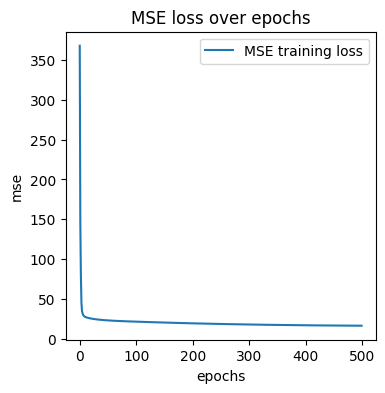

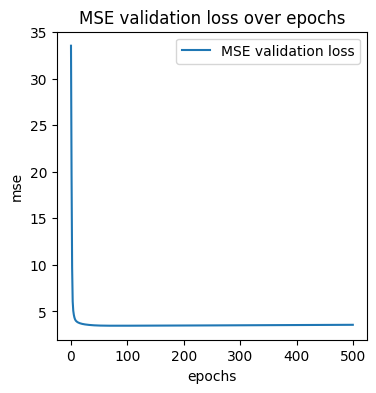

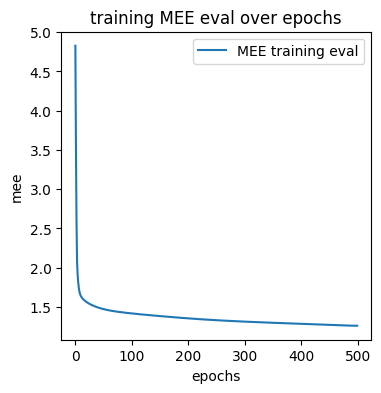

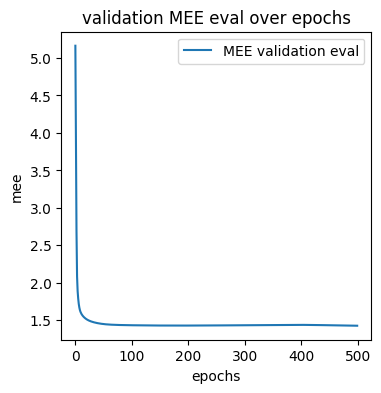

In [12]:
plot_over_epochs(y_values=net.training_losses, title='MSE loss over epochs', y_label='mse', legend='MSE training loss')
plot_over_epochs(y_values=net.validation_losses, title='MSE validation loss over epochs', y_label='mse', legend='MSE validation loss')
plot_over_epochs(y_values=net.training_evaluations, title='training MEE eval over epochs', y_label='mee', legend='MEE training eval')
plot_over_epochs(y_values=net.validation_evaluations, title='validation MEE eval over epochs', y_label='mee', legend='MEE validation eval')

In [13]:
test_mee = net.predict_and_evaluate(test_data, test_target, Metrics.MEE.value)
training_mee = net.training_evaluations[-1]
validation_mee = net.validation_evaluations[-1]
print(f"Training MEE: {training_mee} \nValidation_mee: {validation_mee} \nTest MEE: {test_mee}")

Training MEE: 1.2599983762609799 
Validation_mee: 1.4276981492149583 
Test MEE: 1.3631190006166336


#### 5-fold 500 epochs

In [3]:
data, targets = read_old_cup('datasets/cup/ML-CUP22-TR.csv')
train_data, test_data, train_target, test_target = holdout(data, targets, 0.8, shuffle_set=True)

net = NeuralNetwork(
    n_hidden_layers=3, 
    hidden_layer_sizes=[30, 30, 30], 
    n_output_units=2, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.MEE.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.IDENTITY.value, 
    learning_rate=0.08, 
    reg_lambda=0,
    mom_alpha=0.8,
    nesterov=True,
    epochs=500, 
    batch_size=128, 
    classification=False, 
    early_stopping=False, 
    fast_stopping=False,
    linear_decay=True,
    patience=20, 
    tolerance=0.0001,
    tao=500, 
    verbose=False
)

metrics_results = kfold_cv(5, train_data, train_target, [Metrics.MSE.value, Metrics.MEE.value], net, verbose=True, plot=True)


Fold 5:
Fold validation mse: 4.168750685075235
Fold validation mee: 1.5072613415500344
Training loss: 17.98475779732629
Training evaluation mee: 1.1927116414328116

Fold 1:
Fold validation mse: 3.265758786623849
Fold validation mee: 1.3882158917602527
Training loss: 19.11582077259807
Training evaluation mee: 1.237753800143411

Fold 3:
Fold validation mse: 2.964074457601593
Fold validation mee: 1.315005687747309
Training loss: 19.188295505710922
Training evaluation mee: 1.23833177764221

Fold 4:
Fold validation mse: 2.760941462208479
Fold validation mee: 1.329072485708628
Training loss: 18.539423835158946
Training evaluation mee: 1.218304050303901

Fold 2:
Fold validation mse: 3.9838907585245478
Fold validation mee: 1.5098415123187192
Training loss: 17.924642914432525
Training evaluation mee: 1.2119391784813651


In [4]:
metrics_results

{'tr_losses_mean': 18.550588165045347,
 'tr_losses_std': 0.5363309905346244,
 'tr_evals_mee_mean': 1.21980808960074,
 'tr_evals_mee_std': 0.01710891548443278,
 'validation_mse_mean': 3.428683230006741,
 'validation_mee_mean': 1.4098793838169885,
 'validation_mse_std': 0.555740945384484,
 'validation_mee_std': 0.08423271656835767}

In [5]:
net.train_net(train_data, train_target)
net.predict_and_evaluate(test_data, test_target, Metrics.MEE.value)

1.443682267679237

#### 5-fold fast early stopping

In [12]:
data, targets = read_old_cup('datasets/cup/ML-CUP22-TR.csv')
train_data, test_data, train_target, test_target = holdout(data, targets, 0.8, shuffle_set=True)

net = NeuralNetwork(
    n_hidden_layers=3, 
    hidden_layer_sizes=[30, 30, 30], 
    n_output_units=2, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.MEE.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.IDENTITY.value, 
    learning_rate=0.08, 
    reg_lambda=0,
    mom_alpha=0.8,
    nesterov=True,
    epochs=500, 
    batch_size=128, 
    classification=False, 
    early_stopping=True, 
    fast_stopping=False,
    linear_decay=True,
    patience=30, 
    tolerance=0.001,
    tao=500, 
    verbose=False
)

metrics_results = kfold_cv(10, train_data, train_target, [Metrics.MSE.value, Metrics.MEE.value], net, verbose=True, plot=True)


Fold 10:
Fold validation mse: 3.853767432980887
Fold validation mee: 1.4963421647625759
Training loss: 20.857478829173324
Training evaluation mee: 1.3725595420095935
Internal validation loss: 2.8736778377547423
Internal validation evaluation mee: 1.334829990921576

Fold 4:
Fold validation mse: 2.621237123529791
Fold validation mee: 1.2750437086717976
Training loss: 19.799681311817714
Training evaluation mee: 1.2774997969206678
Internal validation loss: 3.9443873169448964
Internal validation evaluation mee: 1.5652131183719644

Fold 5:
Fold validation mse: 2.829109566880378
Fold validation mee: 1.2961643203087339
Training loss: 20.593982840055062
Training evaluation mee: 1.3262536791006074
Internal validation loss: 2.7678764109483103
Internal validation evaluation mee: 1.3178298746696242

Fold 1:
Fold validation mse: 3.326004080443816
Fold validation mee: 1.3840535098708577
Training loss: 18.117550864376184
Training evaluation mee: 1.2975424185744715
Internal validation loss: 3.83462781

In [13]:
metrics_results

{'tr_losses_mean': 17.994330006185965,
 'tr_losses_std': 1.7039821865078808,
 'internal_val_losses_mean': 3.163897955690173,
 'internal_val_losses_std': 0.4663570329556329,
 'tr_evals_mee_mean': 1.2611202478481782,
 'tr_evals_mee_std': 0.053896801230971375,
 'internal_val_evals_mee_mean': 1.390707112682866,
 'internal_val_evals_mee_std': 0.10252235738667523,
 'validation_mse_mean': 3.5179614796360212,
 'validation_mee_mean': 1.4342568245427672,
 'validation_mse_std': 0.5938514400571506,
 'validation_mee_std': 0.1228032143143448}

In [14]:
train_data, internal_val_data, train_target, internal_val_target = holdout(train_data, train_target, 0.8, shuffle_set=True)
net.train_net(train_data, train_target, internal_val_data, internal_val_target)
net.predict_and_evaluate(test_data, test_target, Metrics.MEE.value)

1.4806157935525421

# 3.ML_CUP

best result so far:

    hidden_layer_sizes=[64, 64, 32], 
    n_output_units=3, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.MEE.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.IDENTITY.value, 
    learning_rate=0.08, 
    reg_lambda=0,
    mom_alpha=0.8,
    nesterov=False,
    epochs=500, 
    batch_size=128, 
    classification=False, 
    early_stopping=False, 
    fast_stopping=False,
    linear_decay=True,
    patience=20, 
    tollerance=0.0001,
    tao=500, 
    verbose=False

    Training MEE: 0.5094019000287047 
    Validation_mee: 0.8019135798639437 
    Test MEE: 0.8425731318371572

3 mins of training

In [90]:
data, targets = read_cup('datasets/cup/CUP_TR.csv')
train_data, test_data, train_target, test_target = holdout(data, targets, 0.8, shuffle_set=True)
train_data, validation_data, train_target, validation_target = holdout(train_data, train_target, 0.66, shuffle_set=True)

net = NeuralNetwork(
    hidden_layer_sizes=[64, 64, 32], 
    n_output_units=3, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.MEE.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.IDENTITY.value, 
    learning_rate=0.1, 
    reg_lambda=0,
    mom_alpha=0.8,
    nesterov=True,
    epochs=500, 
    batch_size=128, 
    classification=False, 
    early_stopping=True, 
    fast_stopping=False,
    linear_decay=True,
    patience=20, 
    tolerance=0.0001,
    tao=500, 
    verbose=False
)
net.train_net(train_data, train_target, validation_data, validation_target)

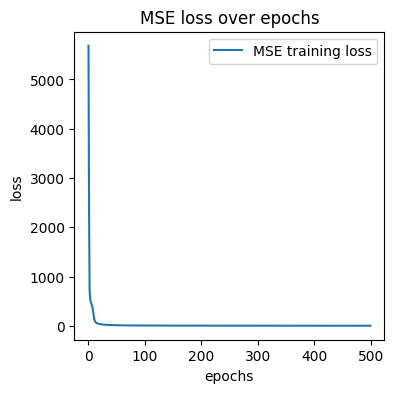

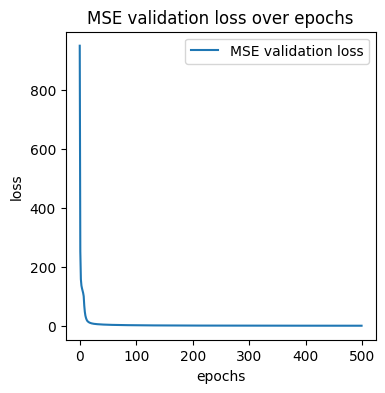

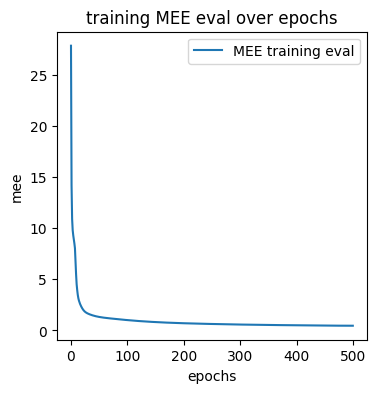

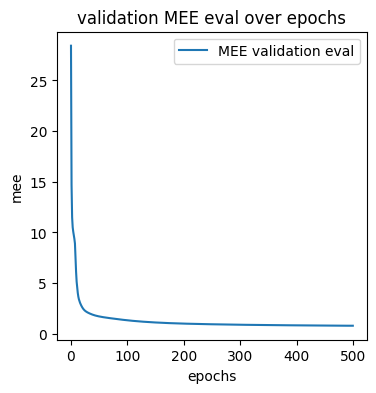

In [91]:
plot_over_epochs(y_values=net.training_losses, title='MSE loss over epochs', y_label='loss', legend='MSE training loss')
plot_over_epochs(y_values=net.validation_losses, title='MSE validation loss over epochs', y_label='loss', legend='MSE validation loss')
plot_over_epochs(y_values=net.training_evaluations, title='training MEE eval over epochs', y_label='mee', legend='MEE training eval')
plot_over_epochs(y_values=net.validation_evaluations, title='validation MEE eval over epochs', y_label='mee', legend='MEE validation eval')

In [92]:
test_mee = net.predict_and_evaluate(test_data, test_target, Metrics.MEE.value)
training_mee = net.training_evaluations[-1]
validation_mee = net.validation_evaluations[-1]
print(f"Training MEE: {training_mee} \nValidation_mee: {validation_mee} \nTest MEE: {test_mee}")

Training MEE: 0.462863144944067 
Validation_mee: 0.791516053907804 
Test MEE: 0.9306124971838233


In [33]:
data, targets = read_cup('datasets/cup/CUP_TR.csv')
train_data, test_data, train_targets, test_targets = holdout(data, targets, 0.8, shuffle_set=True)

net = NeuralNetwork(
    hidden_layer_sizes=[128, 64],
    n_output_units=3, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.MEE.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.IDENTITY.value, 
    learning_rate=0.005, 
    reg_lambda=0,
    mom_alpha=0.6,
    nesterov=True,
    epochs=500, 
    batch_size=1, 
    classification=False, 
    early_stopping=True, 
    fast_stopping=False,
    linear_decay=True,
    patience=20, 
    tolerance=0.001,
    tao=500, 
    verbose=False
)

metrics = [Metrics.MSE.value, Metrics.MEE.value]
kfold_cv(3, train_data, train_targets, metrics, net, verbose=True)   


Fold 3:
Fold validation mse: 1.4639981022863424
Fold validation mee: 0.8216153429380699
Training loss: 60.92190035443102
Training evaluation mee: 0.3297002134113091
Internal validation loss: 1.1932431582894985
Internal validation evaluation mee: 0.8007302066228755

Fold 2:
Fold validation mse: 1.2796004294870484
Fold validation mee: 0.8095587342913676
Training loss: 55.266047452885154
Training evaluation mee: 0.3214403563030802
Internal validation loss: 1.0457932558664897
Internal validation evaluation mee: 0.7057992741371396

Fold 1:
Fold validation mse: 1.498619114187712
Fold validation mee: 0.8137380763632523
Training loss: 45.02624935795497
Training evaluation mee: 0.2889700094506078
Internal validation loss: 1.7769889242312051
Internal validation evaluation mee: 0.9224980960142357


{'tr_losses_mean': 53.738065721757046,
 'tr_losses_std': 6.578701811068728,
 'internal_val_losses_mean': 1.3386751127957313,
 'internal_val_losses_std': 0.31572627005309295,
 'tr_evals_mee_mean': 0.313370193054999,
 'tr_evals_mee_std': 0.01757997022765951,
 'internal_val_evals_mee_mean': 0.8096758589247502,
 'internal_val_evals_mee_std': 0.08869277825565389,
 'validation_mse_mean': 1.414072548653701,
 'validation_mee_mean': 0.81497071786423,
 'validation_mse_std': 0.09613087170153854,
 'validation_mee_std': 0.00499866694345493}

## Hyperparameter Tuning

In [3]:
MODEL_SEL_DATA_PATH = 'datasets/cup/grid_search/CUP_model_selection_data.csv'
MODEL_SEL_TARGETS_PATH = 'datasets/cup/grid_search/CUP_model_selection_targets.csv'
MODEL_ASSESS_DATA_PATH = 'datasets/cup/grid_search/CUP_model_assessment_data.csv'
MODEL_ASSESS_TARGETS_PATH = 'datasets/cup/grid_search/CUP_model_assessment_targets.csv'

In [30]:
# data, targets = read_cup('datasets/cup/CUP_TR.csv')
# train_data, test_data, train_targets, test_targets = holdout(data, targets, 0.8, shuffle_set=True)

# np.savetxt(MODEL_SEL_DATA_PATH, train_data, delimiter=',')
# np.savetxt(MODEL_SEL_TARGETS_PATH, train_targets, delimiter=',')
# np.savetxt(MODEL_ASSESS_DATA_PATH, test_data, delimiter=',')
# np.savetxt(MODEL_ASSESS_TARGETS_PATH, test_targets, delimiter=',')

In [4]:
train_data = np.loadtxt(MODEL_SEL_DATA_PATH, delimiter=',')
train_targets = np.loadtxt(MODEL_SEL_TARGETS_PATH, delimiter=',')
test_data = np.loadtxt(MODEL_ASSESS_DATA_PATH, delimiter=',')
test_targets = np.loadtxt(MODEL_ASSESS_TARGETS_PATH, delimiter=',')

In [5]:
fixed_params = dict(
    n_output_units=3, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.MEE.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.IDENTITY.value, 
    epochs=500, 
    classification=False, 
    early_stopping=True, 
    fast_stopping=False,
    linear_decay=True,
    patience=20, 
    tolerance=0.001,
    tao=500, 
    verbose=False
)

grid_params = dict(
    hidden_layer_sizes=[[64, 32], [128, 64], [32, 64, 32], [64, 64, 32]],
    learning_rate=[0.005, 0.01, 0.1],
    mom_alpha=[0, 0.6, 0.75, 0.9],
    reg_lambda=[0, 0.00001],
    batch_size=[1, 128, 256],
    nesterov=[True, False]
)
results = grid_search(3, train_data, train_targets, [Metrics.MSE.value, Metrics.MEE.value], fixed_params, grid_params, "ml_cup_first_grid", verbose=False, plot=True)

/Users/nicolapitzalis/Documents/uni-ai/ML/ml-project/math_functions/activation.py:128: RuntimeWarning: overflow encountered in exp
  np.exp(x) / (1 + np.exp(x)))
/Users/nicolapitzalis/Documents/uni-ai/ML/ml-project/math_functions/activation.py:128: RuntimeWarning: invalid value encountered in divide
  np.exp(x) / (1 + np.exp(x)))
/Users/nicolapitzalis/Documents/uni-ai/ML/ml-project/math_functions/activation.py:127: RuntimeWarning: overflow encountered in exp
  1 / (1 + np.exp(-x)),
/Users/nicolapitzalis/Documents/uni-ai/ML/ml-project/math_functions/activation.py:128: RuntimeWarning: overflow encountered in exp
  np.exp(x) / (1 + np.exp(x)))
/Users/nicolapitzalis/Documents/uni-ai/ML/ml-project/math_functions/activation.py:128: RuntimeWarning: invalid value encountered in divide
  np.exp(x) / (1 + np.exp(x)))
/Users/nicolapitzalis/Documents/uni-ai/ML/ml-project/math_functions/activation.py:127: RuntimeWarning: overflow encountered in exp
  1 / (1 + np.exp(-x)),
/Users/nicolapitzalis/Docu

In [12]:
top_100 = get_top_n_results('ml_cup_first_grid.json', 100, 'validation_mee_mean', ascending=True)
top_50 = get_top_n_results('ml_cup_first_grid.json', 50, 'validation_mee_mean', ascending=True)
top_20 = get_top_n_results('ml_cup_first_grid.json', 20, 'validation_mee_mean', ascending=True)

In [13]:
results = get_all_results('ml_cup_first_grid.json')
print(f'total number of explored configs: {len(results)}')

validation_mee_means = {model[0]: model[1]['validation_mee_mean'] for model in top_100}

for model_config, mee_mean in validation_mee_means.items():
    print(f"{model_config}: {mee_mean}")

total number of explored configs: 576
hidden_layer_sizes: [128, 64]; learning_rate: 0.005; mom_alpha: 0.6; reg_lambda: 1e-05; batch_size: 1; nesterov: True: 0.7348034993603635
hidden_layer_sizes: [128, 64]; learning_rate: 0.01; mom_alpha: 0; reg_lambda: 0; batch_size: 1; nesterov: False: 0.7668747620424611
hidden_layer_sizes: [128, 64]; learning_rate: 0.01; mom_alpha: 0; reg_lambda: 1e-05; batch_size: 1; nesterov: True: 0.7695430121494592
hidden_layer_sizes: [128, 64]; learning_rate: 0.005; mom_alpha: 0.6; reg_lambda: 1e-05; batch_size: 1; nesterov: False: 0.772989287789518
hidden_layer_sizes: [128, 64]; learning_rate: 0.005; mom_alpha: 0.6; reg_lambda: 0; batch_size: 1; nesterov: True: 0.773674923705374
hidden_layer_sizes: [128, 64]; learning_rate: 0.005; mom_alpha: 0.6; reg_lambda: 0; batch_size: 1; nesterov: False: 0.7746625723093561
hidden_layer_sizes: [128, 64]; learning_rate: 0.01; mom_alpha: 0; reg_lambda: 0; batch_size: 1; nesterov: True: 0.7874151260694849
hidden_layer_sizes: 

In [14]:
print('TOP-100----------------')
count_configs(top_100)
print('\nTOP-50----------------')
count_configs(top_50)
print('\nTOP-20----------------')
count_configs(top_20)

TOP-100----------------
hidden_layer_sizes:
  [128, 64]: 29
  [64, 64, 32]: 22
  [64, 32]: 29
  [32, 64, 32]: 20
learning_rate:
  0.005: 40
  0.01: 23
  0.1: 37
mom_alpha:
  0.6: 30
  0: 32
  0.9: 19
  0.75: 19
reg_lambda:
  1e-05: 35
  0: 65
batch_size:
  1: 63
  128: 26
  256: 11
nesterov:
  True: 50
  False: 50

TOP-50----------------
hidden_layer_sizes:
  [128, 64]: 19
  [64, 64, 32]: 15
  [64, 32]: 12
  [32, 64, 32]: 4
learning_rate:
  0.005: 26
  0.01: 13
  0.1: 11
mom_alpha:
  0.6: 12
  0: 24
  0.9: 9
  0.75: 5
reg_lambda:
  1e-05: 22
  0: 28
batch_size:
  1: 39
  128: 9
  256: 2
nesterov:
  True: 26
  False: 24

TOP-20----------------
hidden_layer_sizes:
  [128, 64]: 12
  [64, 64, 32]: 6
  [64, 32]: 2
learning_rate:
  0.005: 9
  0.01: 9
  0.1: 2
mom_alpha:
  0.6: 5
  0: 11
  0.9: 2
  0.75: 2
reg_lambda:
  1e-05: 11
  0: 9
batch_size:
  1: 18
  128: 2
nesterov:
  True: 10
  False: 10


In [16]:
save_top_plots(top_50, 'ml_cup_first_grid')

From this first grid search, we have superficially explored a wide range of hyper-parameters. We now report the best performing ones in orther to direct the next search from this point on.

While it seems evident that the optimal batch size is of size 1 (also 128 didn't perform so bad), it isn't very clear whether the layer configurations have to be wider or deeper, since they all perform around the same ([32, 32] is the only one that appears less in the top 50).

The smaller learning rates performed best, the optimal one being 0.005 (which makes sense since we are are using stochastic gradient descent). 

The momentum seems to be well distributed, even tho smaller values (especially 0) are eventually preferred. Also higher learning rates exploit lower momentums, balancing off in the equation (notice that considering the stochastic approach, lower learning rates with lower momentum are a natural outcome--we would expect higher learning rates and higher moemntum for batch versions).

Nesterov momentum seems to be quite irrelevant, as also discussed by Bengio (put reference) in the case of stochastic gradient descent.

Now we will explore a bit further some more learning rates and regularization terms, keeping just the two best performing layer structures. Also, we keep fixed the nesterov momentum (set to False) and the batch_size (set to 1)

In [17]:
fixed_params = dict(
    n_output_units=3, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.MEE.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.IDENTITY.value, 
    reg_lambda=0,
    epochs=500, 
    batch_size=1,
    nesterov=False, 
    classification=False, 
    early_stopping=True, 
    fast_stopping=False,
    linear_decay=True,
    patience=20, 
    tolerance=0.001,
    tao=500, 
    verbose=False
)

grid_params = dict(
    hidden_layer_sizes=[[128, 64], [64, 64, 32], [256, 128], [128, 64, 64, 32]],
    learning_rate=[0.002, 0.005, 0.008],
    mom_alpha=[0.6, 0.75, 0.9],
    reg_lambda=[0, 0.0001, 0.000025, 0.00001],
)

results = grid_search(5, train_data, train_targets, [Metrics.MSE.value, Metrics.MEE.value], fixed_params, grid_params, "ml_cup_second_grid", verbose=False, plot=True)

/Users/nicolapitzalis/Documents/uni-ai/ML/ml-project/math_functions/activation.py:128: RuntimeWarning: overflow encountered in exp
  np.exp(x) / (1 + np.exp(x)))
/Users/nicolapitzalis/Documents/uni-ai/ML/ml-project/math_functions/activation.py:128: RuntimeWarning: invalid value encountered in divide
  np.exp(x) / (1 + np.exp(x)))
/Users/nicolapitzalis/Documents/uni-ai/ML/ml-project/math_functions/activation.py:127: RuntimeWarning: overflow encountered in exp
  1 / (1 + np.exp(-x)),
/Users/nicolapitzalis/Documents/uni-ai/ML/ml-project/math_functions/activation.py:127: RuntimeWarning: overflow encountered in exp
  1 / (1 + np.exp(-x)),
/Users/nicolapitzalis/Documents/uni-ai/ML/ml-project/math_functions/activation.py:128: RuntimeWarning: overflow encountered in exp
  np.exp(x) / (1 + np.exp(x)))
/Users/nicolapitzalis/Documents/uni-ai/ML/ml-project/math_functions/activation.py:128: RuntimeWarning: invalid value encountered in divide
  np.exp(x) / (1 + np.exp(x)))
/Users/nicolapitzalis/Docu

In [5]:
top_100 = get_top_n_results('ml_cup_second_grid.json', 100, 'validation_mee_mean', ascending=True)
top_50 = get_top_n_results('ml_cup_second_grid.json', 50, 'validation_mee_mean', ascending=True)
top_20 = get_top_n_results('ml_cup_second_grid.json', 20, 'validation_mee_mean', ascending=True)

In [6]:
results = get_all_results('ml_cup_second_grid.json')
print(f'total number of explored configs: {len(results)}')

validation_mee_means = {model[0]: model[1]['validation_mee_mean'] for model in top_100}

for model_config, mee_mean in validation_mee_means.items():
    print(f"{model_config}: {mee_mean}")

total number of explored configs: 144
hidden_layer_sizes: [128, 64]; learning_rate: 0.005; mom_alpha: 0.6; reg_lambda: 1e-05: 0.6701414303953703
hidden_layer_sizes: [256, 128]; learning_rate: 0.005; mom_alpha: 0.6; reg_lambda: 0.0001: 0.6847184719330428
hidden_layer_sizes: [128, 64]; learning_rate: 0.005; mom_alpha: 0.75; reg_lambda: 0.0001: 0.6868716249689804
hidden_layer_sizes: [128, 64]; learning_rate: 0.005; mom_alpha: 0.75; reg_lambda: 1e-05: 0.6978581780538777
hidden_layer_sizes: [128, 64]; learning_rate: 0.002; mom_alpha: 0.75; reg_lambda: 0: 0.7010777206757313
hidden_layer_sizes: [128, 64]; learning_rate: 0.005; mom_alpha: 0.6; reg_lambda: 0: 0.7015187274097707
hidden_layer_sizes: [64, 64, 32]; learning_rate: 0.002; mom_alpha: 0.75; reg_lambda: 1e-05: 0.7036882471451833
hidden_layer_sizes: [256, 128]; learning_rate: 0.005; mom_alpha: 0.6; reg_lambda: 2.5e-05: 0.7050202900667665
hidden_layer_sizes: [128, 64]; learning_rate: 0.005; mom_alpha: 0.6; reg_lambda: 0.0001: 0.7066368390

In [7]:
print('TOP-100----------------')
count_configs(top_100)
print('\nTOP-50----------------')
count_configs(top_50)
print('\nTOP-20----------------')
count_configs(top_20)

TOP-100----------------
hidden_layer_sizes:
  [128, 64]: 33
  [256, 128]: 31
  [64, 64, 32]: 24
  [128, 64, 64, 32]: 12
learning_rate:
  0.005: 35
  0.002: 44
  0.008: 21
mom_alpha:
  0.6: 44
  0.75: 36
  0.9: 20
reg_lambda:
  1e-05: 24
  0.0001: 25
  0: 26
  2.5e-05: 25

TOP-50----------------
hidden_layer_sizes:
  [128, 64]: 21
  [256, 128]: 12
  [64, 64, 32]: 12
  [128, 64, 64, 32]: 5
learning_rate:
  0.005: 15
  0.002: 28
  0.008: 7
mom_alpha:
  0.6: 31
  0.75: 16
  0.9: 3
reg_lambda:
  1e-05: 12
  0.0001: 13
  0: 11
  2.5e-05: 14

TOP-20----------------
hidden_layer_sizes:
  [128, 64]: 12
  [256, 128]: 3
  [64, 64, 32]: 4
  [128, 64, 64, 32]: 1
learning_rate:
  0.005: 9
  0.002: 7
  0.008: 4
mom_alpha:
  0.6: 11
  0.75: 9
reg_lambda:
  1e-05: 4
  0.0001: 5
  0: 5
  2.5e-05: 6


It seems that the best results come from the [128, 64], suggesting that deeper or wider networks do not provide better generalization. We also notice better performance on smaller learning rates and smaller momentum values. Surprisingly enough the value for regularization term does not seem to be clear. 

In [8]:
save_top_plots(top_50, 'ml_cup_second_grid', 'ml_cup_second_grid_top_50')
save_top_plots(top_20, 'ml_cup_second_grid', 'ml_cup_second_grid_top_20')

By plotting the internal validation curves, it seems that some of the models stop before the 500 limit epochs. The very same models that have a "noisier" loss curve. For this reason, we now introduce higher values of regularization.

We will now explore the best two network architectures: a wider one and a deeper one. For each of them we will go through a finer search for the selected hyperparameters.

In [5]:
fixed_params = dict(
    n_output_units=3, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.MEE.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.IDENTITY.value, 
    epochs=500, 
    batch_size=1,
    nesterov=False, 
    classification=False, 
    early_stopping=True, 
    fast_stopping=False,
    linear_decay=True,
    patience=20, 
    tolerance=0.001,
    tao=500, 
    verbose=False
)

grid_params = dict(
    hidden_layer_sizes=[[128, 64], [64, 64, 32]],
    learning_rate=[0.001, 0.002, 0.003, 0.0004, 0.005],
    mom_alpha=[0, 0.5, 0.6, 0.75],
    reg_lambda=[0, 0.00001, 0.000025, 0.0001, 0.00025, 0.0005],
)

results = grid_search(5, train_data, train_targets, [Metrics.MSE.value, Metrics.MEE.value], fixed_params, grid_params, "ml_cup_third_grid", verbose=False, plot=True)

In [22]:
top_100 = get_top_n_results('ml_cup_third_grid.json', 100, 'validation_mee_mean', ascending=True)
top_50 = get_top_n_results('ml_cup_third_grid.json', 50, 'validation_mee_mean', ascending=True)
top_20 = get_top_n_results('ml_cup_third_grid.json', 20, 'validation_mee_mean', ascending=True)

In [21]:
results = get_all_results('ml_cup_third_grid.json')
print(f'total number of explored configs: {len(results)}')

validation_mee_means = {model[0]: model[1]['validation_mee_mean'] for model in top_100}

for model_config, mee_mean in validation_mee_means.items():
    print(f"{model_config}: {mee_mean}")

total number of explored configs: 240
hidden_layer_sizes: [64, 64, 32]; learning_rate: 0.002; mom_alpha: 0.75; reg_lambda: 0: 0.6828761699741523
hidden_layer_sizes: [128, 64]; learning_rate: 0.005; mom_alpha: 0.6; reg_lambda: 0: 0.6884229312186159
hidden_layer_sizes: [128, 64]; learning_rate: 0.005; mom_alpha: 0.6; reg_lambda: 1e-05: 0.691102614249211
hidden_layer_sizes: [128, 64]; learning_rate: 0.005; mom_alpha: 0.5; reg_lambda: 0.0001: 0.6979534249069517
hidden_layer_sizes: [128, 64]; learning_rate: 0.005; mom_alpha: 0.6; reg_lambda: 2.5e-05: 0.7006008087080455
hidden_layer_sizes: [64, 64, 32]; learning_rate: 0.003; mom_alpha: 0.6; reg_lambda: 2.5e-05: 0.7020346971108907
hidden_layer_sizes: [64, 64, 32]; learning_rate: 0.005; mom_alpha: 0.5; reg_lambda: 0: 0.7022496993304284
hidden_layer_sizes: [64, 64, 32]; learning_rate: 0.003; mom_alpha: 0.5; reg_lambda: 0: 0.7042577802930483
hidden_layer_sizes: [128, 64]; learning_rate: 0.003; mom_alpha: 0.75; reg_lambda: 0.0001: 0.7055006920445

In [8]:
print('TOP-100----------------')
count_configs(top_100)
print('\nTOP-50----------------')
count_configs(top_50)
print('\nTOP-20----------------')
count_configs(top_20)

TOP-100----------------
hidden_layer_sizes:
  [64, 64, 32]: 50
  [128, 64]: 50
learning_rate:
  0.002: 25
  0.005: 35
  0.003: 35
  0.001: 5
mom_alpha:
  0.75: 31
  0.6: 30
  0.5: 28
  0: 11
reg_lambda:
  0: 21
  1e-05: 20
  0.0001: 18
  2.5e-05: 22
  0.00025: 14
  0.0005: 5

TOP-50----------------
hidden_layer_sizes:
  [64, 64, 32]: 23
  [128, 64]: 27
learning_rate:
  0.002: 8
  0.005: 23
  0.003: 19
mom_alpha:
  0.75: 16
  0.6: 18
  0.5: 14
  0: 2
reg_lambda:
  0: 11
  1e-05: 12
  0.0001: 9
  2.5e-05: 12
  0.00025: 6

TOP-20----------------
hidden_layer_sizes:
  [64, 64, 32]: 9
  [128, 64]: 11
learning_rate:
  0.002: 2
  0.005: 9
  0.003: 9
mom_alpha:
  0.75: 5
  0.6: 9
  0.5: 6
reg_lambda:
  0: 7
  1e-05: 4
  0.0001: 3
  2.5e-05: 5
  0.00025: 1


In [19]:
save_top_plots(top_50, 'ml_cup_third_grid', 'ml_cup_third_grid_top_50')
save_top_plots(top_20, 'ml_cup_third_grid', 'ml_cup_third_grid_top_20')

We will go through the same grid search as before, now focusing on the tanh activation function

In [10]:
fixed_params = dict(
    n_output_units=3, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.MEE.value,
    activation_hidden_type_value=ActivationFunction.TANH.value, 
    activation_output_type_value=ActivationFunction.IDENTITY.value, 
    epochs=500, 
    batch_size=1,
    nesterov=False, 
    classification=False, 
    early_stopping=True, 
    fast_stopping=False,
    linear_decay=True,
    patience=20, 
    tolerance=0.001,
    tao=500, 
    verbose=False
)

grid_params = dict(
    hidden_layer_sizes=[[128, 64], [64, 64, 32]],
    learning_rate=[0.001, 0.002, 0.003, 0.0004, 0.005],
    mom_alpha=[0, 0.5, 0.6, 0.75],
    reg_lambda=[0, 0.00001, 0.000025, 0.0001, 0.00025, 0.0005],
)

results = grid_search(5, train_data, train_targets, [Metrics.MSE.value, Metrics.MEE.value], fixed_params, grid_params, "ml_cup_tanh_grid", verbose=False, plot=True)

/Users/nicolapitzalis/anaconda3/envs/ml/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [14]:
top_100 = get_top_n_results('ml_cup_tanh_grid.json', 100, 'validation_mee_mean', ascending=True)
top_50 = get_top_n_results('ml_cup_tanh_grid.json', 50, 'validation_mee_mean', ascending=True)
top_20 = get_top_n_results('ml_cup_tanh_grid.json', 20, 'validation_mee_mean', ascending=True)

In [12]:
results = get_all_results('ml_cup_tanh_grid.json')
print(f'total number of explored configs: {len(results)}')

validation_mee_means = {model[0]: model[1]['validation_mee_mean'] for model in top_100}

for model_config, mee_mean in validation_mee_means.items():
    print(f"{model_config}: {mee_mean}")

total number of explored configs: 240
hidden_layer_sizes: [128, 64]; learning_rate: 0.002; mom_alpha: 0; reg_lambda: 0: 0.747958164416568
hidden_layer_sizes: [128, 64]; learning_rate: 0.002; mom_alpha: 0; reg_lambda: 2.5e-05: 0.7600166956101223
hidden_layer_sizes: [128, 64]; learning_rate: 0.0004; mom_alpha: 0.75; reg_lambda: 0.0001: 0.7601979161857031
hidden_layer_sizes: [128, 64]; learning_rate: 0.001; mom_alpha: 0; reg_lambda: 2.5e-05: 0.7652211598833537
hidden_layer_sizes: [128, 64]; learning_rate: 0.002; mom_alpha: 0; reg_lambda: 0.0001: 0.7657940695100885
hidden_layer_sizes: [128, 64]; learning_rate: 0.0004; mom_alpha: 0.5; reg_lambda: 1e-05: 0.7677229006333213
hidden_layer_sizes: [128, 64]; learning_rate: 0.0004; mom_alpha: 0.6; reg_lambda: 1e-05: 0.768335878049576
hidden_layer_sizes: [128, 64]; learning_rate: 0.0004; mom_alpha: 0.75; reg_lambda: 1e-05: 0.7686707229995722
hidden_layer_sizes: [128, 64]; learning_rate: 0.001; mom_alpha: 0.5; reg_lambda: 2.5e-05: 0.768771077678996


In [15]:
print('TOP-100----------------')
count_configs(top_100)
print('\nTOP-50----------------')
count_configs(top_50)
print('\nTOP-20----------------')
count_configs(top_20)

TOP-100----------------
hidden_layer_sizes:
  [128, 64]: 69
  [64, 64, 32]: 31
learning_rate:
  0.002: 15
  0.0004: 48
  0.001: 30
  0.003: 6
  0.005: 1
mom_alpha:
  0: 38
  0.75: 18
  0.5: 24
  0.6: 20
reg_lambda:
  0: 16
  2.5e-05: 16
  0.0001: 16
  1e-05: 16
  0.00025: 17
  0.0005: 19

TOP-50----------------
hidden_layer_sizes:
  [128, 64]: 37
  [64, 64, 32]: 13
learning_rate:
  0.002: 6
  0.0004: 24
  0.001: 18
  0.003: 2
mom_alpha:
  0: 18
  0.75: 6
  0.5: 12
  0.6: 14
reg_lambda:
  0: 10
  2.5e-05: 11
  0.0001: 11
  1e-05: 8
  0.00025: 5
  0.0005: 5

TOP-20----------------
hidden_layer_sizes:
  [128, 64]: 18
  [64, 64, 32]: 2
learning_rate:
  0.002: 4
  0.0004: 11
  0.001: 5
mom_alpha:
  0: 7
  0.75: 4
  0.5: 5
  0.6: 4
reg_lambda:
  0: 6
  2.5e-05: 4
  0.0001: 5
  1e-05: 4
  0.00025: 1


In [17]:
save_top_plots(top_20, 'ml_cup_tanh_grid', 'ml_cup_tanh_grid_top_20')

The results are worse than the sigmoid's versions, so we will just stick to it.

In [5]:
top_10_thid_grid = get_top_n_results('ml_cup_third_grid.json', 10, 'validation_mee_mean', ascending=True)

In [6]:
list_models = get_list_models(top_10_thid_grid)

We will now observe if the model can perform better if trained for longer times (i.e. more epochs). We will use an internal validation set in order to stop the training whenever it starts overfitting

In [12]:
fixed_params = dict(
    n_output_units=3, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.MEE.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.IDENTITY.value, 
    epochs=500, 
    batch_size=1,
    nesterov=False, 
    classification=False, 
    early_stopping=True, 
    fast_stopping=False,
    linear_decay=True,
    patience=20, 
    tolerance=0.1,
    tao=500, 
    verbose=False
)
results = {}

for index, model in enumerate(list_models):
    params = {**fixed_params, **model}

    # training
    net = NeuralNetwork(**fixed_params, **model)
    result = kfold_cv(10, train_data, train_targets, [Metrics.MSE.value, Metrics.MEE.value], net, config_name=f'ml_cup_best_models_500_epochs_es/model_{index+1}', verbose=False, plot=True, log_scale=True)
    
    # training and evaluation on model assessment test set
    net.train_net(train_data, train_targets)
    ts_evaluation = net.predict_and_evaluate(test_data, test_targets, Metrics.MEE.value)

    result['test_evaluation'] = ts_evaluation
    results[str(params)] = result

    # print results (tr, internal_val and val results are the mean of the 10 folds)
    print(f"{model}: \ntr_evaluation: {result['tr_evals_mee_mean']} \ninternal_val_evaluation: {result['internal_val_evals_mee_mean']} \nval_evaluation: {result['validation_mee_mean']} \nts_evaluation: {ts_evaluation}")

    with open('json_results/ml_cup_best_models_500_epochs_es.json', 'w', encoding='utf-8') as f:
        json.dump(results, f, indent=4)


{'hidden_layer_sizes': [64, 64, 32], 'learning_rate': 0.002, 'mom_alpha': 0.75, 'reg_lambda': 0}: 
tr_evaluation: 0.32815184427054084 
internal_val_evaluation: 0.6739875515909451 
val_evaluation: 0.6601844576339284 
ts_evaluation: 0.5461899843431346
{'hidden_layer_sizes': [128, 64], 'learning_rate': 0.005, 'mom_alpha': 0.6, 'reg_lambda': 0}: 
tr_evaluation: 0.2988537014255147 
internal_val_evaluation: 0.6568940090903167 
val_evaluation: 0.6352433963851861 
ts_evaluation: 0.5554352315556866
{'hidden_layer_sizes': [128, 64], 'learning_rate': 0.005, 'mom_alpha': 0.6, 'reg_lambda': 1e-05}: 
tr_evaluation: 0.3063084291669262 
internal_val_evaluation: 0.6533882399580543 
val_evaluation: 0.652106830018109 
ts_evaluation: 0.5427044295149207
{'hidden_layer_sizes': [128, 64], 'learning_rate': 0.005, 'mom_alpha': 0.5, 'reg_lambda': 0.0001}: 
tr_evaluation: 0.36270667993481825 
internal_val_evaluation: 0.6691174216396447 
val_evaluation: 0.6538288991667823 
ts_evaluation: 0.6096651324462915
{'hidd

In [9]:
fixed_params = dict(
    n_output_units=3, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.MEE.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.IDENTITY.value, 
    epochs=2000, 
    batch_size=1,
    nesterov=False, 
    classification=False, 
    early_stopping=True, 
    fast_stopping=False,
    linear_decay=True,
    patience=20, 
    tolerance=0.01,
    tao=2000, 
    verbose=False
)
results = {}

for index, model in enumerate(list_models):
    params = {**fixed_params, **model}

    # training
    net = NeuralNetwork(**fixed_params, **model)
    result = kfold_cv(10, train_data, train_targets, [Metrics.MSE.value, Metrics.MEE.value], net, config_name=f'ml_cup_best_models_2000_epochs_es/model_{index+1}', verbose=False, plot=True, log_scale=True)
    
    # training and evaluation on model assessment test set
    net.train_net(train_data, train_targets)
    ts_evaluation = net.predict_and_evaluate(test_data, test_targets, Metrics.MEE.value)

    result['test_evaluation'] = ts_evaluation
    results[str(params)] = result

    # print results (tr and val results are the mean of the 10 folds)
    print(f"{model}: \ntr_evaluation: {result['tr_evals_mee_mean']} \ninternal_val_evaluation: {result['internal_val_evals_mee_mean']} \nval_evaluation: {result['validation_mee_mean']} \nts_evaluation: {ts_evaluation}")

    with open('json_results/ml_cup_best_models_2000_epochs_es.json', 'w', encoding='utf-8') as f:
        json.dump(results, f, indent=4)


{'hidden_layer_sizes': [64, 64, 32], 'learning_rate': 0.002, 'mom_alpha': 0.75, 'reg_lambda': 0}: 
tr_evaluation: 0.22553162893606085 
internal_val_evaluation: 0.6360113436397236 
val_evaluation: 0.6240524687357212 
ts_evaluation: 0.5027905278103022
{'hidden_layer_sizes': [128, 64], 'learning_rate': 0.005, 'mom_alpha': 0.6, 'reg_lambda': 0}: 
tr_evaluation: 0.19899228122727566 
internal_val_evaluation: 0.6193398292507196 
val_evaluation: 0.6317149712852836 
ts_evaluation: 0.45051112431547446
{'hidden_layer_sizes': [128, 64], 'learning_rate': 0.005, 'mom_alpha': 0.6, 'reg_lambda': 1e-05}: 
tr_evaluation: 0.18284736318990427 
internal_val_evaluation: 0.5855813477881643 
val_evaluation: 0.5785240581565768 
ts_evaluation: 0.481318161609012
{'hidden_layer_sizes': [128, 64], 'learning_rate': 0.005, 'mom_alpha': 0.5, 'reg_lambda': 0.0001}: 
tr_evaluation: 0.2682907890704388 
internal_val_evaluation: 0.5884721993916731 
val_evaluation: 0.5900111700707307 
ts_evaluation: 0.5020055244203132
{'hi

Performing training for 2000 epochs increases the validation evaluation mean by a very small amount. We will choose the latter to win the cup ;)


It is interesting too see if an ensemble model would perform better than the top-10s.

In [8]:
fixed_params = dict(
    n_output_units=3, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.MEE.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.IDENTITY.value, 
    epochs=2000, 
    batch_size=1,
    nesterov=False, 
    classification=False, 
    early_stopping=True, 
    fast_stopping=False,
    linear_decay=True,
    patience=20, 
    tolerance=0.1,
    tao=2000, 
    verbose=False
)

# build ensemble
models = []
for index, model in enumerate(list_models):
    params = {**fixed_params, **model}
    models.append(NeuralNetwork(**fixed_params, **model))
ensemble = Ensemble(models)

# cross-validation on ensemble
kfold_model_result, kfold_ensemble_result = kfold_cv_ensemble(10, train_data, train_targets, [Metrics.MSE.value, Metrics.MEE.value], ensemble, verbose=False)

with open('json_results/ensemble_top_10.json', 'w', encoding='utf-8') as f:
    json.dump({**kfold_model_result, **kfold_ensemble_result}, f, indent=4)

In [9]:
fixed_params = dict(
    n_output_units=3, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.MEE.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.IDENTITY.value, 
    epochs=2000, 
    batch_size=1,
    nesterov=False, 
    classification=False, 
    early_stopping=True, 
    fast_stopping=False,
    linear_decay=True,
    patience=20, 
    tolerance=0.1,
    tao=2000, 
    verbose=False
)

models = []
for index, model in enumerate(list_models):
    params = {**fixed_params, **model}
    models.append(NeuralNetwork(**fixed_params, **model))
ensemble = Ensemble(models)

In [10]:
ensemble.train(train_data, train_targets)

In [21]:
results = {}
for index, model in enumerate(ensemble.models):
    y_pred = model.predict(test_data)
    results[f"model_{index+1}"] = evaluate(y_pred, test_targets, Metrics.MEE.value)
y_pred = ensemble.predict(test_data)
results["ensemble"] = evaluate(y_pred, test_targets, Metrics.MEE.value)

with open('json_results/ensemble_top_10_test_results.json', 'w', encoding='utf-8') as f:
    json.dump(results, f, indent=4) 